In [0]:
!pip install keras

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
X_train4D = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32') # 60000 * 28 * 28 * 1(black)
X_test4D = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32') # 60000 * 28 * 28 * 1(black)
X_train4D_normalize = X_train4D / 255
X_test4D_normalize =X_test4D / 255
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

# CNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28, 28, 1), activation='relu')) #16 * (28*28*1)
model.add(MaxPool2D(pool_size=(2, 2))) #16 * (14*14*1)
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', input_shape=(28, 28, 1), activation='relu')) #36 * (14*14*1)
model.add(MaxPool2D(pool_size=(2, 2))) #36 * (7*7*1)
model.add(Dropout(0.25))

model.add(Flatten()) #將36*7*7*1=1764轉成一維的神經元輸入
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=X_train4D_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.4904 - acc: 0.8471 - val_loss: 0.0959 - val_acc: 0.9726
Epoch 2/10
 - 3s - loss: 0.1396 - acc: 0.9588 - val_loss: 0.0626 - val_acc: 0.9807
Epoch 3/10
 - 3s - loss: 0.1015 - acc: 0.9700 - val_loss: 0.0499 - val_acc: 0.9843
Epoch 4/10
 - 3s - loss: 0.0826 - acc: 0.9763 - val_loss: 0.0463 - val_acc: 0.9856
Epoch 5/10
 - 3s - loss: 0.0707 - acc: 0.9780 - val_loss: 0.0397 - val_acc: 0.9876
Epoch 6/10
 - 3s - loss: 0.0627 - acc: 0.9811 - val_loss: 0.0386 - val_acc: 0.9890
Epoch 7/10
 - 3s - loss: 0.0552 - acc: 0.9832 - val_loss: 0.0448 - val_acc: 0.9868
Epoch 8/10
 - 3s - loss: 0.0510 - acc: 0.9840 - val_loss: 0.0334 - val_acc: 0.9899
Epoch 9/10
 - 3s - loss: 0.0453 - acc: 0.9865 - val_loss: 0.0341 - val_acc: 0.9897
Epoch 10/10
 - 3s - loss: 0.0413 - acc: 0.9875 - val_loss: 0.0330 - val_acc: 0.9896


In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.xlabel('Epochs')
    plt.xlabel(train)
    plt.legend(['train', 'validation'], loc=2)
    plt.show()

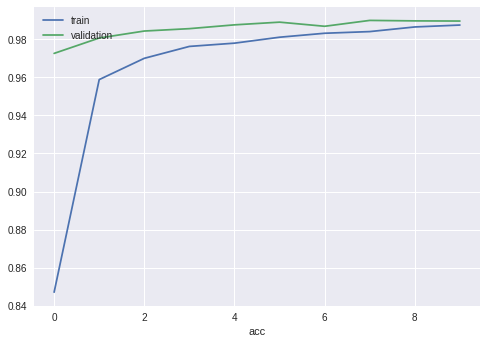

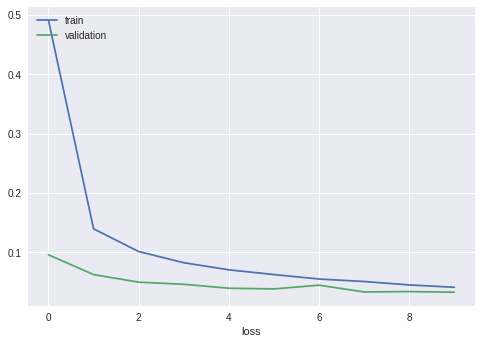

10000/10000 [==============================] - 1s 104us/step


[0.023964979313380538, 0.9917]

In [0]:
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(X_test4D_normalize,y_test_onehot)
scores

# Confusion Matrix

In [0]:
prediction = model.predict_classes(X_test4D_normalize)

In [0]:
import pandas as pd
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,2,1,0,0
1,0,1131,1,0,0,1,0,1,1,0
2,2,2,1026,0,0,0,0,2,0,0
3,0,0,0,1003,0,3,0,2,2,0
4,0,0,0,0,975,0,1,1,1,4
5,1,0,0,4,0,884,2,0,0,1
6,4,2,0,0,2,1,949,0,0,0
7,0,1,3,3,0,0,0,1019,1,1
8,2,0,3,2,1,0,0,2,959,5
